<h2 align="center" style="color:purple">Phase 2:Credit Card Project</h2>

## Business Analysis and launch of AB testing: Targeting Untapped Market

1) Insights specific to customers with age group of 21 - 24
2) People with age group of 21 -24 accounts to ~17% of customer base in the data
3) Avg annual income of this age group is less than 50k
4) They don't have much credit history .
5) Usage of credit cards as payment type is relatively low compared to other groups
6) Avg transaction amount made with credit cards is also low compared to other groups
7) Top 3 most used shopping products categories : Electronics, Entertainment ,  Health and wellness or Groceries

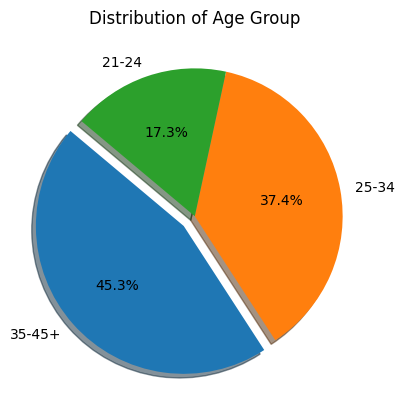

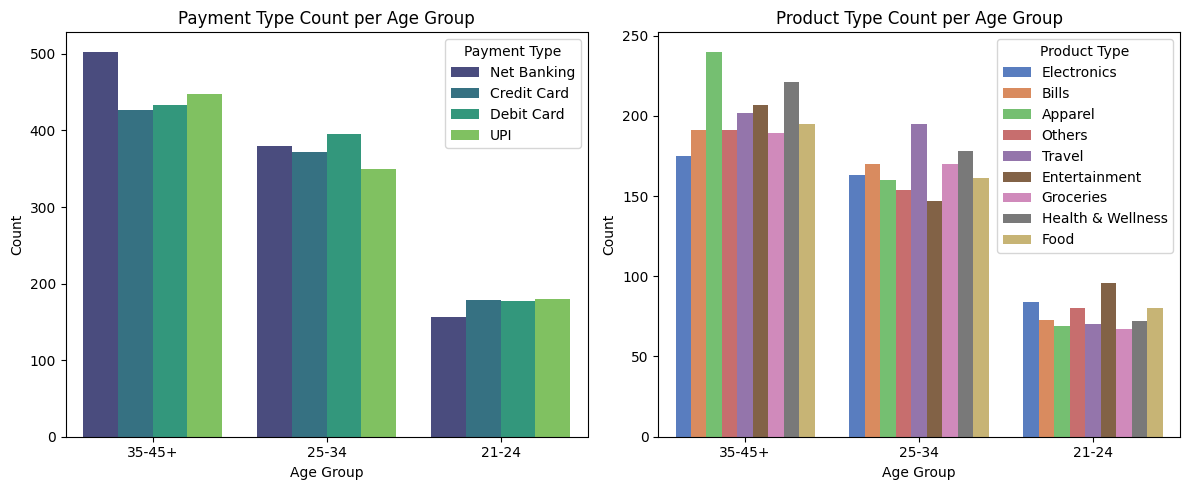

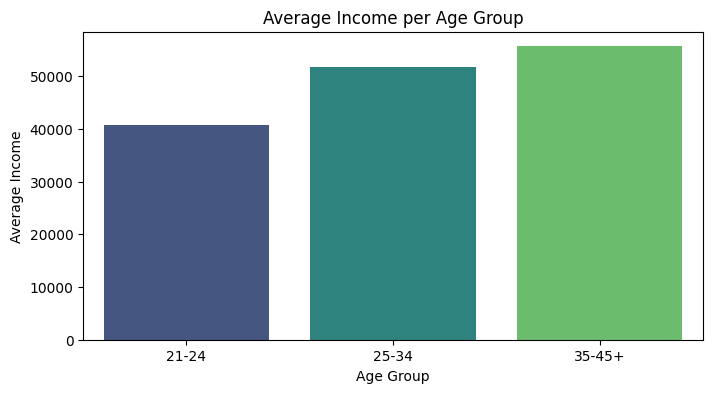

## (1) Pre-Campaign
We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need based on the statistical power and effect size that we agree upon after discussing with business. We will use

In [6]:
#import required libraries
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
alpha = 0.05 # 5% significance level 
power = 0.8
effect_size = 0.2

sms.tt_ind_solve_power(
    effect_size=0.2,
    alpha=alpha,
    power=power,
    ratio=1,
    alternative='two-sided'
)                           # for effect size 2 we need 393 people for this campaign to launch

393.4056989990351

In [10]:
# Calculate the required sample size for different effect sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 1, Required Sample Size: 16 customers


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

#### Forming control and test groups

1.We have identified approximately 691 customers within the age group of 21 to 24. We will select 100 customers from this pool for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

## POST CAMPAIGN

In [12]:
df = pd.read_csv("avg_transactions_after_campaign.csv")
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [13]:
df.shape

(62, 3)

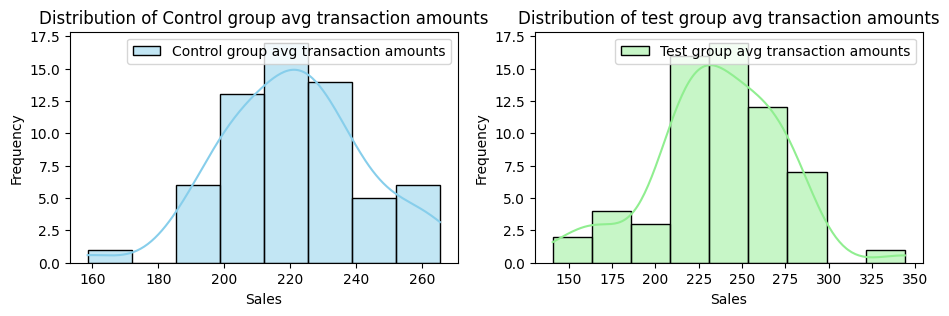

In [14]:
 # Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

In [18]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,2023-09-13,214.92,214.85
8,2023-09-18,265.13,212.60
9,2023-09-19,232.88,207.63
16,2023-09-26,222.95,213.30
22,2023-10-02,238.39,203.10
23,2023-10-03,253.95,234.26
25,2023-10-05,239.47,216.37
26,2023-10-06,200.70,166.70
27,2023-10-07,200.91,170.01
28,2023-10-08,188.30,150.27


In [19]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']].shape[0]/df.shape[0]

0.2903225806451613

In [31]:
control_mean = df["control_group_avg_tran"].mean()
control_std = df["control_group_avg_tran"].std()
control_mean , control_std 

(221.1751612903226, 21.35919211202701)

In [32]:
test_mean = df["test_group_avg_tran"].mean()
test_std = df["test_group_avg_tran"].std() 
test_mean , test_std

(235.9835483870968, 36.658082109186374)

In [33]:
sample_size = df.shape[0]
sample_size

62

In [34]:
a = test_std**2/sample_size
b = control_std**2/sample_size

z_score = (test_mean - control_mean)/np.sqrt(a + b)
z_score

2.748297374569113

In [35]:
# For a significance level of 5% (0.05) in a right-tailed test, the critical Z-value is approximately 1.645
critical_z_value = st.norm.ppf(1 - alpha)  # Right-tailed test at 5% significance level
critical_z_value

1.6448536269514722

In [36]:
z_score > critical_z_value  # z_score is greater than critical_z_value 

True

In [37]:
from scipy import stats
stats.norm.cdf(z_score)
p_value = 1 - stats.norm.cdf(z_score)
p_value

0.0029952824622024865

In [38]:
p_value < alpha   # p_value is less than significance level 

True

In [39]:
# Performing Z-test with above considerations
z_statistic, p_value = sm.stats.ztest( df['test_group_avg_tran'],df['control_group_avg_tran'],alternative = 'larger')
z_statistic, p_value

(2.7482973745691135, 0.002995282462202502)

In [42]:
# Calculate the 95% confidence interval (CI) for test group 

test_group_CI = st.norm.interval(0.95,loc = test_mean,scale = test_std/np.sqrt(sample_size))
test_group_CI          # if we use new credit card on average customer will be spending amount between the give range :

(226.85877713642867, 245.1083196377649)